# Project 2. Bernstein Polynomials
James Della-Giustina


## Overview

We saw in class that for a given $f\in C([0,1])$ and given $n\in \mathbb N$ one can construct the *Bernstein Polynomial of degree $n$*
\begin{equation*}
  B_n(f)(x) = \sum_{j = 0}^n f\left(\frac j n\right)\beta_{nj}(x),
\end{equation*}
where
\begin{equation*}
  \beta_{nj}(x) = {n\choose j}x^j(1 - x)^{n - j}
  \qquad
  j = 0, 1, \ldots, n.
\end{equation*}
For $n$ fixed, the functions $\beta_{n0}, \beta_{n1}, \ldots, \beta_{nn}$ form a basis for $\mathcal P_n(\mathbb R)$ called the *Bernstein basis*. In particular, the above formula for $B_n(f)(x)$ is a linear combiniation of these basis functions, and the coefficients in the linear combination are evaluations of $f$ at uniformly spaced points of $[0,1]$. We saw in class that as $n\to \infty$, $B_n(f)$ converges uniformly to $f$ over the interval $[0,1]$ in the sense that
\begin{equation*}
  \lim_{n\to \infty}\|B_n(f) - f\|_{C([0,1])} = 0.
\end{equation*}
In this project I will walk you through the creation of some code that will allow one to approximate a given function $f\in C([0,1])$ with the associated Bernstein polynomial of desired degree. By letting the degrees in these approximations get large, we will produce a visualization that supports the uniform convergence $B_n(f)\to f$ as $n\to \infty$.

## Problem 1

The above formula for $B_n(f)$ is a linear combination of the polynomials $\beta_{nj}$, $j= 0, 1, \ldots, n$. Our first task is to represent each of these polynomials as a finite list of numbers. One way to do this is to choose evenly spaced points $0 = z_0< z_1< \ldots< z_N = 1$ and represent each of the functions $\beta_{nj}$ as the list of its outputs at $z_0, z_1, \ldots, z_N$. Specifically, we will create the following discretized versions of $\beta_{nj}$ ($j= 0, 1, \ldots, n$):
\begin{equation*}
\begin{split}
  \beta_{n0} & \sim [\beta_{n0}(z_0), \beta_{n0}(z_1), \ldots, \beta_{n0}(z_N)]\\
  \beta_{n1} & \sim [\beta_{n1}(z_0), \beta_{n1}(z_1), \ldots, \beta_{n1}(z_N)]\\
  & \vdots \\
  \beta_{nn} & \sim [\beta_{nn}(z_0), \beta_{nn}(z_1), \ldots, \beta_{nn}(z_N)].
\end{split}
\end{equation*}

Write a Python function called `berns_poly(n, j, z)` where the inputs are
* `n`: a positive integer indicating the degree
* `j`: an integer in the set $\{0, 1, \ldots, n\}$ indicating which of the degree $n$ Bernstein basis functions will be represented
* `z`: a vector $(z_0, z_1, \ldots, z_N)$ where $0 = z_0< z_1< \ldots< z_N = 1$. The length $N$ of `z` should be unspecified in the sense that a vector of any length should be allowed to be input as `z`.

and the returned value is the either the vector
\begin{equation*}
  [\beta_{nj}(z_0), \beta_{nj}(z_1), \ldots, \beta_{nj}(z_N)]\\
\end{equation*}
or its transpose depending on your preference (you'll likely develop a preference for which is more convenient in subsequent problems). This vector will be our approximation for the polynomial $\beta_{nj}$. You may find that the built-in Python function `scipy.special.binom(n,j)` is useful for computing the binomial coefficients ${n\choose j}$ (you don't have to code the binomial coefficients from scratch). In case you need inspiration for where to start, I've computed the approximating vectors for each of $\beta_{50}$, $\beta_{51}$ and $\beta_{52}$ with $N = 50$ sample points and plotted these vectors on the same coordinate axes. Of course, the function you produce should be more streamlined and more versatile than what I've provided.



In [ ]:
import numpy as np
import scipy.special # for the binomial coefficients
import matplotlib.pyplot as plt

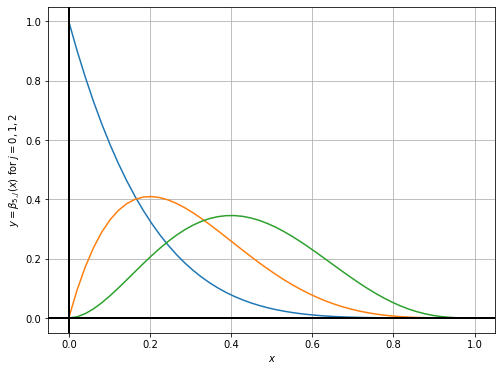

In [ ]:
z_trial = np.linspace(0, 1, 50) # start, stop, number of points
beta_50 = scipy.special.binom(5,0)*(1 - z_trial)**5
beta_51 = scipy.special.binom(5,1)*(z_trial)*(1 - z_trial)**4
beta_52 = scipy.special.binom(5,2)*(z_trial**2)*(1 - z_trial)**3

fig = plt.figure( figsize=(8, 6))
ax = fig.add_subplot(111) # a 1x1 array with a plot placed in position 1
# add the three plots to the ax object:
ax.plot(z_trial, beta_50)
ax.plot(z_trial, beta_51)
ax.plot(z_trial, beta_52)
# labeling and making the plot look pretty:
ax.axvline(linewidth=2, color = 'black')
ax.axhline(linewidth=2, color='black')
ax.set_xlabel('$x$')
ax.set_ylabel('$y= \\beta_{5,j}(x)$ for $j = 0, 1, 2$')
ax.grid(True, which='both')

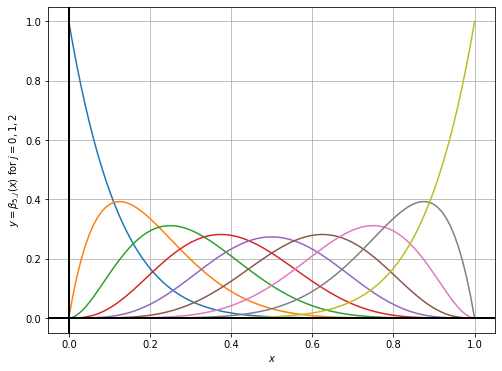

In [ ]:
# This is just an extra snippet of code building off the given example above.
# It allows a plot of all bernstein polynomials of a given n and z, hardcoded below.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111) # a 1x1 array with a plot placed in position 1
n=8
z=100
z_space = np.linspace(0, 1, z)
for i in range(0, n+1):
  beta_n_j = scipy.special.binom(n,i)*((z_space)**(i))*((1-z_space)**(n-i))
  #print(i)
  ax.plot(z_space, beta_n_j)
  #print(beta_n_j)
# labeling and making the plot look pretty:
ax.axvline(linewidth=2, color = 'black')
ax.axhline(linewidth=2, color='black')
ax.set_xlabel('$x$')
ax.set_ylabel('$y= \\beta_{5,j}(x)$ for $j = 0, 1, 2$')
ax.grid(True, which='both')
#beta_n_j.T

Modify the following code cell to create your `berns_poly` function as described above. After you've written your function you should test your code to be sure that (a) it runs and (b) it gives you results that make sense. I'll leave it up to you and your groupmates to determine whether the output of your code makes sense.

In [ ]:
def berns_poly(n, j, z):
  """
  Create a discretization of the jth Bernstein basis polynomial of degree n
  with sample points indicated by z.

    --- Inputs ---
    * n the degree of the polynomial
    * j an integer in {0, 1, ... , n} indicating which Bernstein polynomial to make
    * z a numpy array of x-values in the interval [0,1] should be uniformly spaced

    --- Outputs ---
    * the array of y-values of the jth Bernstein polynomial of degree n
    corresponding to the input array z
  """
  # Create the sample points from evenly spaced intervals from 0 to 1 given some z
  z_space = np.linspace(0, 1, z)
  # Calculates the given Bernstein polynomials for specified
  beta_n_j = scipy.special.binom(n,j)*((z_space)**(j))*((1-z_space)**(n-j))

  return beta_n_j # dont forget to modify the return value

In [ ]:
berns_poly(5,0,50)

array([1.00000000e+00, 9.02039980e-01, 8.11911868e-01, 7.29136364e-01,
       6.53254137e-01, 5.83825396e-01, 5.20429466e-01, 4.62664366e-01,
       4.10146381e-01, 3.62509637e-01, 3.19405680e-01, 2.80503047e-01,
       2.45486843e-01, 2.14058316e-01, 1.85934432e-01, 1.60847452e-01,
       1.38544503e-01, 1.18787158e-01, 1.01351007e-01, 8.60252361e-02,
       7.26121990e-02, 6.09269947e-02, 5.07970417e-02, 4.20616533e-02,
       3.45716130e-02, 2.81887494e-02, 2.27855114e-02, 1.82445436e-02,
       1.44582614e-02, 1.13284262e-02, 8.76572021e-03, 6.68932236e-03,
       5.02648287e-03, 3.71209868e-03, 2.68828863e-03, 1.90396858e-03,
       1.31442667e-03, 8.80898418e-04, 5.70141988e-04, 3.54013317e-04,
       2.09041324e-04, 1.16003084e-04, 5.94990183e-05, 2.75280756e-05,
       1.10629162e-05, 3.62509637e-06, 8.60252361e-07, 1.13284262e-07,
       3.54013317e-09, 0.00000000e+00])

## Problem 2


Recall from class (and from the overview to this project) that $B_n(f)$ is the following linear combination of $\beta_{n0},\beta_{n1}, \ldots, \beta_{nn}$ with coefficients generated as evaluations of $f$:
\begin{equation*}
  B_n(f)(x) = \sum_{j = 0}^nf\left(\frac j n\right)\beta_{nj}(x).
\end{equation*}
Because we approximated $\beta_{nj}$ in Problem 1 as $[\beta_{nj}(z_0), \beta_{nj}(z_1), \ldots, \beta_{nj}(z_N)]$, we get an associated approximation for $B_n(f)$ via
\begin{equation*}
\begin{split}
  B_n(f)
  & \sim
  \sum_{j = 0}^n f\left(\frac j n\right)[\beta_{nj}(z_0), \beta_{nj}(z_1), \ldots, \beta_{nj}(z_N)]^{\tt t} \\
  & =
  \begin{bmatrix}
  \beta_{n0}(z_0) & \beta_{n1}(z_0) & \ldots &\beta_{nn}(z_0)\\
  \beta_{n0}(z_1) & \beta_{n1}(z_1) & \ldots &\beta_{nn}(z_1)\\
  \vdots & \vdots & \ddots & \vdots \\
  \beta_{n0}(z_N) & \beta_{n1}(z_N) & \ldots &\beta_{nn}(z_N)\\
  \end{bmatrix}
  \begin{bmatrix}
  f(\frac0n)\\ f(\frac 1 n)\\ \vdots \\ f(1)
  \end{bmatrix},
\end{split}
\end{equation*}
where I chose to write the approximating vectors for the Bernstein basis polynomials as column vectors so that matrix multiplication can act from the left. In particular, our approximation of $B_n(f)$ is a vector in $\mathbb R^N$ (represented as a matrix multiplication). The $j^{\text{th}}$ column of the matrix above is (after taking transpose if necessary) exacly the output from the function `berns_poly(n,j,z)` created in Problem 1, where `z` is the obvious vector. Create a Python function called `make_berns_matrix(n, z)`, where the inputs are
* `n`: the degree of a Bernstein polynomial
* `z`: a numpy array containing evenly spaced $x$-values $0 = z_0< z_1< \ldots< z_N = 1$

and the output is the $N\times (n + 1)$ matrix
\begin{equation*}
\begin{bmatrix}
  \beta_{n0}(z_0) & \beta_{n1}(z_0) & \ldots &\beta_{nn}(z_0)\\
  \beta_{n0}(z_1) & \beta_{n1}(z_1) & \ldots &\beta_{nn}(z_1)\\
  \vdots & \vdots & \ddots & \vdots \\
  \beta_{n0}(z_N) & \beta_{n1}(z_N) & \ldots &\beta_{nn}(z_N)\\
  \end{bmatrix}.
\end{equation*}
Before you move on, you should double check that your data is stored the way you want it to be. I will leave the testing of your code, including the determination of whether the output of your code makes sense, up to you.

In [ ]:
def make_berns_matrix(n, z):
  """
  Store the vector approximations of the Bernstein basis of degree n
  as the columns of a matrix of size np.shape(z)[0] x (n + 1)
  inputs:
  * n: the degree of bernstein basis polynomials
  * z: evenly spaced x-values 0 = z_0< z_1< ... < z_N = 1
  output:
  * a matrix whose jth column is a vector approximation for the jth
  Bernstein basis polynomial j = 0, 1, ..., n
  """
  # Create the sample points from evenly spaced intervals from 0 to 1 given some z
  z_space = np.linspace(0, 1, z)
  # Initialize first row of Bernstein matrix
  berns_matrix=berns_poly(n,0,z)
  for j in range(1, n+1):
    # Calculate the Bernstein polynomial for our sample points
    beta_n_j = berns_poly(n,j,z)
    # Concantanate the Bernstein polynomial B(n,j) onto a new row in the Bernstein Matrix
    berns_matrix=np.vstack((berns_matrix, beta_n_j))
  # Transpose the Bernstein Matrix such that it is in the desired form
  berns_matrix=berns_matrix.T
  return berns_matrix


In [ ]:
make_berns_matrix

<function __main__.make_berns_matrix>

In [ ]:
make_berns_matrix(3,10)

array([[1.        , 0.        , 0.        , 0.        ],
       [0.70233196, 0.26337449, 0.03292181, 0.00137174],
       [0.47050754, 0.40329218, 0.11522634, 0.01097394],
       [0.2962963 , 0.44444444, 0.22222222, 0.03703704],
       [0.17146776, 0.41152263, 0.32921811, 0.0877915 ],
       [0.0877915 , 0.32921811, 0.41152263, 0.17146776],
       [0.03703704, 0.22222222, 0.44444444, 0.2962963 ],
       [0.01097394, 0.11522634, 0.40329218, 0.47050754],
       [0.00137174, 0.03292181, 0.26337449, 0.70233196],
       [0.        , 0.        , 0.        , 1.        ]])

## Problem 3

In this problem we will actually approximate a continuous function $f\in C([0,1])$ using $B_n(f)$, the $n^{\text{th}}$-degree Bernstein polynomial associated to $f$. For concreteness I will use $f(x) = 5\sin (2\pi x)$, but in principle we could do this for any $f\in C([0, 1])$. In the code cell below I have written a function `f` that takes as input a vector $x$ and returns the vector obtained by the coordinatewise application $5\sin(2\pi x)$. We will approximate this function using (our approximations for) Bernstein polynomials.

Write a Python function called `bernstein_f(n, z)` where the inputs are:  
* `n`: the degree $n$ of our approximation for $B_n(f)$
* `z`: an array of uniformly spaced $x$-values with $0 = z_0< z_1< \ldots< z_N = 1$. The number of such $x$-values should not be hard-coded in your function. In other words, I should be able to put in an array of evenly spaced $x$-values where I can choose the number of such $x$-values as I please.

and the output is the vector in $\mathbb R^N$ (where $N$ is the number of coordinates of the input `z`) given by the matrix-vector product
\begin{equation*}
  \begin{bmatrix}
  \beta_{n0}(z_0) & \beta_{n1}(z_0) & \ldots &\beta_{nn}(z_0)\\
  \beta_{n0}(z_1) & \beta_{n1}(z_1) & \ldots &\beta_{nn}(z_1)\\
  \vdots & \vdots & \ddots & \vdots \\
  \beta_{n0}(z_N) & \beta_{n1}(z_N) & \ldots &\beta_{nn}(z_N)\\
  \end{bmatrix}
  \begin{bmatrix}
  f(\frac0n)\\ f(\frac 1 n)\\ \vdots \\ f(1)
  \end{bmatrix}
\end{equation*}
as discussed in Problem 2. In particular this matrix vector product is our approximation for $B_n(f)$.

In [ ]:
def f(x):
  return 5*np.sin(2*np.pi* x)

def bernstein_f(n, z):
  """
  Create (an approximation to) the Bernstien polynomial of degree n associated to f
  Inputs:
  * n: degree of Bernstein polynomial that will approximate f
  * z: a vector of evenly spaced points 0 = z_0 < z_1< ... < z_N = 1
  Output:
  * an N-vector approximate to the Bernstein polynomial associated to f.
  """
  #z_space = np.linspace(0, 1, z)
  x_vals = np.linspace(0, 1, n + 1)
  y_vals = f(x_vals) # calls the function f defined above to make vector of y_values
  approx = make_berns_matrix(n , z) @ y_vals
  # multiply Bernstein matrix & y_vals then return the result
  return approx # dont forget to modify the return value



In [ ]:
bernstein_f(5,100)

array([ 0.00000000e+00,  2.33486878e-01,  4.53722890e-01,  6.60873595e-01,
        8.55111280e-01,  1.03661482e+00,  1.20556954e+00,  1.36216705e+00,
        1.50660514e+00,  1.63908763e+00,  1.75982418e+00,  1.86903022e+00,
        1.96692677e+00,  2.05374030e+00,  2.12970258e+00,  2.19505057e+00,
        2.25002624e+00,  2.29487647e+00,  2.32985287e+00,  2.35521165e+00,
        2.37121348e+00,  2.37812337e+00,  2.37621050e+00,  2.36574808e+00,
        2.34701321e+00,  2.32028676e+00,  2.28585320e+00,  2.24400049e+00,
        2.19501989e+00,  2.13920586e+00,  2.07685592e+00,  2.00827047e+00,
        1.93375268e+00,  1.85360836e+00,  1.76814576e+00,  1.67767551e+00,
        1.58251041e+00,  1.48296530e+00,  1.37935698e+00,  1.27200397e+00,
        1.16122645e+00,  1.04734608e+00,  9.30685866e-01,  8.11570007e-01,
        6.90323778e-01,  5.67273370e-01,  4.42745754e-01,  3.17068536e-01,
        1.90569820e-01,  6.35780634e-02, -6.35780634e-02, -1.90569820e-01,
       -3.17068536e-01, -

Finally, generate four plots where each plot includes
* the graph of $f(x) = \sin(2\pi x)$ over the interval $[0,1]$
* the graph of $B_n(f)$ for some degree $n$ over the interval $[0,1]$.

The degree $n$ should increase with each plot and you should choose your $n$'s so that your four plots give a "story board" view of the uniform convergence of $B_n(f)$ to $f$. In particular, the Bernstein polynomial should get successively closer to $f$ with each plot. For your convenience, I've produced four plots below, each containing $5\sin(2\pi x)$ and $y = x(1 - x)$. You'll have to modify them according to the instructions.

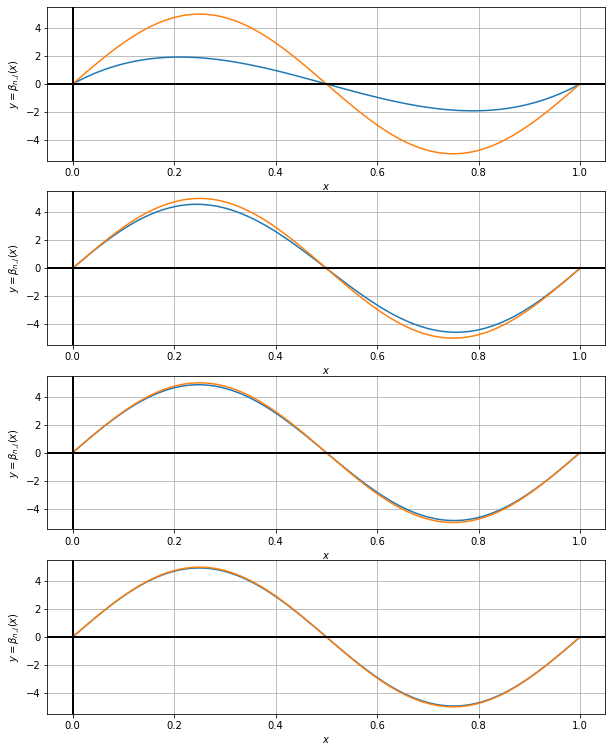

In [ ]:
degree = 5
z = np.linspace(0, 1, 100)
fig = plt.figure( figsize=(10, 13))
num_plots = 4
for j in range(1,num_plots+ 1):
  ax = fig.add_subplot(num_plots,1,j)
  # We want this to converge quickly so we have multiple powers of j and an exponent
  # to increase accuracy at every step
  ax.plot(z, bernstein_f(j*j*j*degree^j,len(z)))
  ax.plot(z, f(z))
  ax.axvline(linewidth=2, color = 'black')
  ax.axhline(linewidth=2, color='black')
  ax.set_xlabel('$x$')
  ax.set_ylabel('$y= \\beta_{n,j}(x)$')
  ax.grid(True, which='both')

## Submission


This project is due on Monday, November 22 at 11:59 p.m. Submit your .ipynb notebook to Blackboard. Please attempt to submit your project well in advance of the deadline so you will have time to resolve unforeseen obstacles to submission (poor internet connection, etc.).

If you want a reasonable grade on this project, your code must run without me needing to modify it. Before you submit, you should restart your runtime and run each cell in succession to be sure none of your early cells are using undefined variables that got stored in the kernel in later cells. In fact, you should do this somewhat frequently so you won't have to scramble to fix broken code immediately before the submission deadline.